<a href="https://colab.research.google.com/github/soyoonjeong/MachineLearning/blob/main/5_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 소개 

**회귀** : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링 <br>
⭐ 머신러신 회귀 예측의 핵심 : 주어진 피처(독립변수)와 결정 값(종속변수) 데이터 기반에서 학습을 통해 ✅**최적의 회귀 계수**를 찾아내는 것 
<br>
- 독립변수 개수 : 1개 => 단일 회귀 / 여러 개 => 다중 회귀
- 회귀 계수의 결합 : 선형 => 선형 회귀 / 비선형 => 비선형 회귀

**선형 회귀** : 실제 값과 예측 값 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화하는 방식 <br>
**규제** : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것 
- 일반 선형 회귀 : 규제 X
- 릿지 : L2 규제, 상대적으로 큰 회귀 계수 값의 예측 영향도 감소하기 위해 회귀 계수 값 작게 함
- 라쏘 : L1 규제, 상대적으로 작은 회귀 계수 값을 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 함
- 엘라스틱넷 : L1+L2
- 로지스틱 회귀 : 분류에 사용되는 선형 모델 

# 단순 선형 회귀를 통한 회귀 이해 

**단순 선형 회귀** : 독립변수 1개, 종속변수 1개인 선형 회귀 <BR>
⭐ 최적의 회귀 모델을 만든다는 것 : 전체 데이터의 **잔차(오류 값) 합이 최소**가 되는 모델을 만든다는 것 
<br>
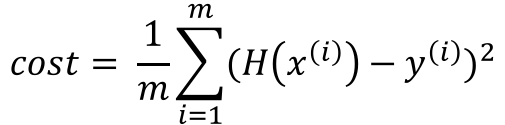
<BR>
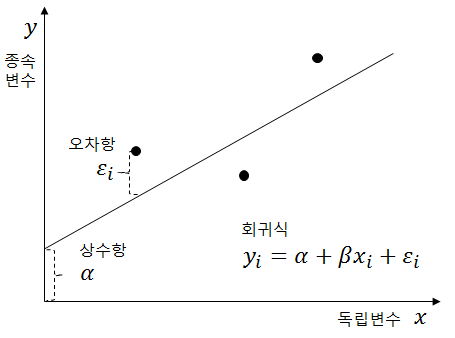

# 비용 최소화하기 - 경사 하강법 소개 

반복적으로 비용 함수의 반환 값, 즉 ⭐**오류(예측값과 실제 값이 작아지는 방향)가 작아지는 방향성**을 가지고 회귀 계수를 지속해서 보정 
<BR> -> 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단, 그 때 회귀 계수를 최적 파라미터로 반환<BR>
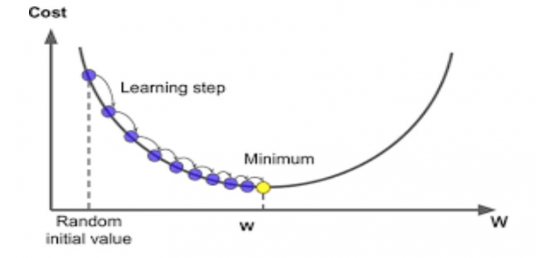

### 실제값을 Y = 4X+6 시뮬레이션하는 데이터 값 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)


In [ ]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


### w0, w1 값을 최소화할 수 있도록 업데이트 수행하는 함수 생성 

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

### 반복적으로 경사 하강법을 이용하여 get_weight_updates() 호출하여 w1, w0 업데이트하는 함수 생성 

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

### 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행 

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


### 확률적 경사 하강법(Stochastic Gradient Descent)
PROBLEM : 기존 경사 하강법은 전체 학습 데이터를 사용하기에 시간이 오래 걸림<BR>
SOLUTION : 일부 데이터만 사용해 파라미터 업데이트 

In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size = 10, iters =1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  
  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update
  return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028 w0:6.156
Gradient Descent Total Cost:0.9937


# 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## LinearRegression 클래스 - Ordinary Least Squares

**LinearRegression 클래스** : 예측값과 실제 값의 RSS을 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스 <br>
**Ordinary Least Squares(최소제곱법)** : 오차의 제곱이 최소가 되는 해를 구하는 방법<br>
PROBLEM : **다중공선성 문제** (OLS 기반 회귀 계수 계산은 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감함)
SOLUTION : 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용, PCA 차원 축소 적용 

## 회귀 평가 지표

- MAE (Mean Absolute Error) : 오차 절댓값 평균
- MSE (Mean Squared Error) : 오차 제곱 평균
- RMSE (Root Mean Squared Error) : 루트씌운 오차 제곱 평균
- R**2 : 실제 값의 분산 대비 예측값의 분산 비율 <BR>

사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문에 <br>-1을 곱하여 음수로 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함 

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현 

CRIM: 지역별 범죄 발생률
<br>ZN: 25,000평방피트를 초과하는 거주 지역의 비율
<br>NDUS: 비상업 지역 넓이 비율
<br>CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
<br>NOX: 일산화질소 농도
<br>RM: 거주할 수 있는 방 개수
<br>AGE: 1940년 이전에 건축된 소유 주택의 비율
<br>DIS: 5개 주요 고용센터까지의 가중 거리
<br>RAD: 고속도로 접근 용이도
<br>TAX: 10,000달러당 재산세율
<br>PTRATIO: 지역의 교사와 학생 수 비율
<br>B: 지역의 흑인 거주 비율
<br>LSTAT: 하위 계층의 비율
<br>MEDV: 본인 소유의 주택 가격(중앙값)

### 데이터 로드 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df.shape)
boston_df.head()

(506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 각 칼럼이 회귀 결과에 미치는 영향 시각화

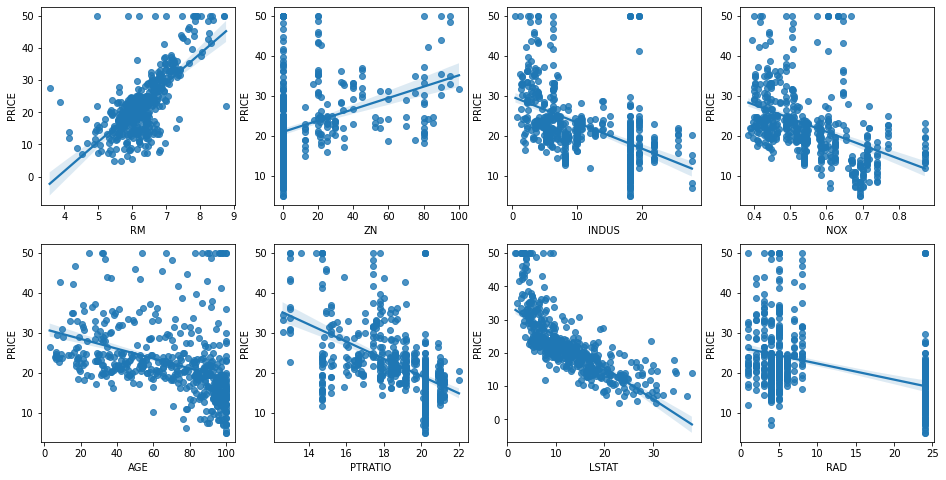

In [ ]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(features):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature, y='PRICE', data = boston_df, ax = axs[row][col])

=> RM(거주할 수 있는 방 개수), LSTAT(하위 계층 비율)이 주택 가격에 영향을 많이 미치는 것 같음 

### 회귀 모델 생성

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state =49)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.4f}, RMSE : {1:.4f}".format(mse, rmse))
print('Variance score : {0:.4f}'.format(r2_score(y_test, y_preds)))

MSE : 23.0775, RMSE : 4.8039
Variance score : 0.7013


In [ ]:
print("절편 값 : ", lr.intercept_)
print("회귀 계수값 : ", np.round(lr.coef_,1))

절편 값 :  37.534076330824234
회귀 계수값 :  [ -0.1   0.    0.    3.4 -16.4   3.5   0.   -1.4   0.3  -0.   -0.9   0.
  -0.7]


In [ ]:
coeff = pd.Series(data= np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending =False)

RM          3.5
CHAS        3.4
RAD         0.3
ZN          0.0
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.7
PTRATIO    -0.9
DIS        -1.4
NOX       -16.4
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1, inplace=False)

lr = LinearRegression()
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1* neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores,2))
print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 2))
print("5 folds의 평균 RMSE scores:", np.round(avg_rmse,2))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.83


# 다항 회귀와 과(대)적합/과소적합 이해 

## 다항 회귀 이해 

**다항 회귀** : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현됨, 선형 회귀(선형 계수는 선형이기에)<br> 

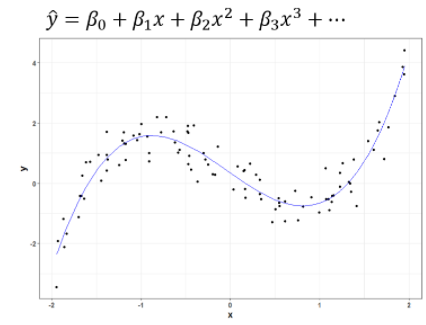

다항회귀를 사이킷런에서 구현하기 위해서는<br>
1. PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환
2. 변환된 polynomial 피처에 선형 회귀 적용 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def polynomial_func(x):
  return 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3 # 3차 다항 회귀 결정 함수식 : 1+2*x1+ 3*x1**2+ 4*x2**3
X = np.arange(4).reshape(2,2)
print("일차 다항식 계수 feature : \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값 :", y)

일차 다항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : [  5 125]


In [ ]:
# 1. PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("삼차 다항식 계수 feature : \n", poly_ftr)

# 2. 변환된 다항식 피처에 선형 회귀 적용
model = LinearRegression()
model.fit(poly_ftr, y)
print("polynomial 회귀 계수 :", np.round(model.coef_,2))
print("polynomial 회귀 shape :", model.coef_.shape)

삼차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
polynomial 회귀 계수 : [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
polynomial 회귀 shape : (10,)


In [ ]:
# 파이프라인으로 3차 다항회귀 학습

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
  return 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3 # 3차 다항 회귀 결정 함수식 : 1+2*x1+ 3*x1**2+ 4*x2**3
X = np.arange(4).reshape(2,2)
print("일차 다항식 계수 feature : \n", X)
y = polynomial_func(X)
print("삼차 다항식 결정값 :", y)

model = Pipeline([('Poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])

model = model.fit(X, y)
print("polynomial 회귀 계수\n", np.round(model.named_steps['linear'].coef_,2))

일차 다항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : [  5 125]
polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 과소적합 및 과적합 이해 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

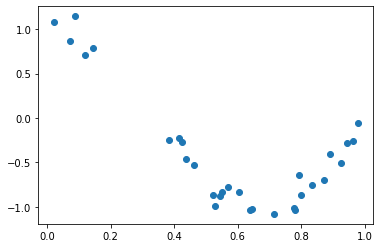

In [ ]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


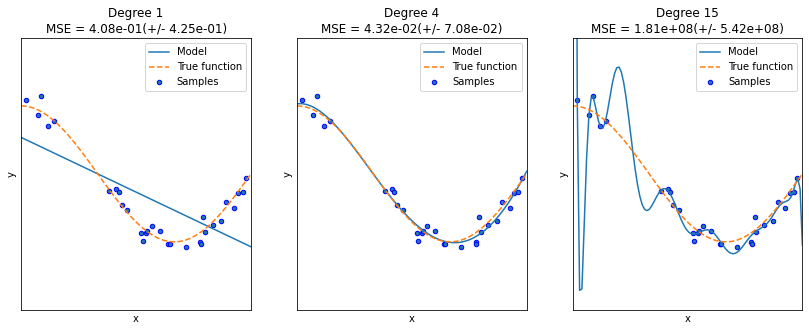

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- Degree 1 : 과소적합 (단순)
- Degree 4 : 가장 뛰어난 예측 성능
- Degree 15 : 과적합 (복잡) <br>
차수가 높을수록 과적합 문제 발생 

## 편향-분산 트레이드오프

<img width = "500" src = "https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnZUoV%2Fbtqygi9gLOl%2FKK1oMnG6weHudeByX6Z3S0%2Fimg.png">

- **과소적합** : 높은 편향/낮은 분산 -> 단순화되어 한 방향으로 치우쳐져 있음
- **과대적합** : 높은 분산/낮은 편향 -> 복잡해 높은 변동성 <br>
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음 

# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

## 규제 선형 모델의 개요 

PROBLEM : 실제 값과 예측 값 차이를 최소화하는 것만 고려 -> 학습데이터에 지나치게 맞추게 되고 회귀계수 커짐 -> 변동성이 심해져 예측 성능 저하

SOLUTION : 규제 (회귀 계수의 크기 제어해 과적합 개선) <br>
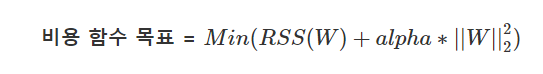
<br>
- alpha = 0 : W가 커도 비용함수는 MIN(RSS(W))
- alpha = 무한대 : 비용함수는 W를 0에 가깝게 최소화해야 함

**규제** : alpha를 0에서부터 지속적으로 값을 증가시키면서 (페널티 부여) 회귀 계수 값의 크기를 감소시킬 수 있음
- **릿지 회귀** : W의 제곱에 페널티 부여, 상대적으로 큰 회귀 계수 값 더 작게 
- **라쏘 회귀** : W의 절댓값에 페널티 부여, 예측 영향력이 작은 피처의 회귀 계수 0으로 만듦

## 릿지 회귀 

### alpha값을 10으로 RMSE 측정

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
print("Boston 데이터셋 크기 : ", boston_df.shape)

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1, inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 folds 의 개별 Negative MSE scores :",np.round(neg_mse_scores,2))
print("5 folds 의 개별 RMSE scores :", np.round(rmse_scores,3))
print("5 folds 의 평균 RMSE : ", avg_rmse)

Boston 데이터셋 크기 :  (506, 14)
5 folds 의 개별 Negative MSE scores : [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE :  5.518166280868968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### alpha 값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정


In [ ]:
alphas = [0,0.1, 1,10,100]

for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print("alpha {0}일 떄 5 folds의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))

alpha 0일 떄 5 folds의 평균 RMSE : 5.829
alpha 0.1일 떄 5 folds의 평균 RMSE : 5.788
alpha 1일 떄 5 folds의 평균 RMSE : 5.653
alpha 10일 떄 5 folds의 평균 RMSE : 5.518
alpha 100일 떄 5 folds의 평균 RMSE : 5.330


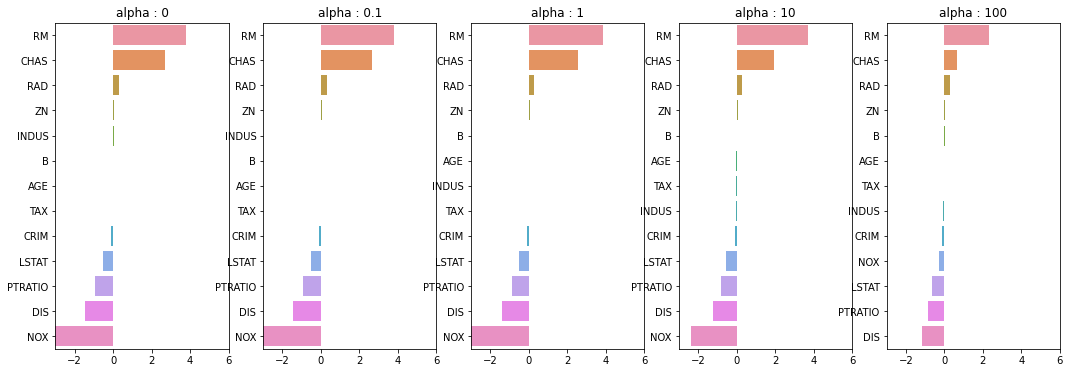

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,axs = plt.subplots(figsize = (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alpha : '+str(alpha)
  coeff_df[colname] = coeff

  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x= coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

alpha 값(규제 계수)이 커질수록 회귀 계수 값을 작게 만듦

상대적으로 큰 NOX의 회귀 계수를 작게 만들어 영향력 🔽

In [ ]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha : '+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending = False)

,alpha : 0,alpha : 0.1,alpha : 1,alpha : 10,alpha : 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 라쏘 회귀 

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, X_data=None, y_target = None, verbose = True, return_coeff = True):
  coeff_df = pd.DataFrame()
  if verbose : print("######",model_name, "######")
  for param in params:
    if model_name =='Ridge': model = Ridge(alpha = param)
    elif model_name =='Lasso': model = Lasso(alpha = param)
    elif model_name =='ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3F}".format(param, avg_rmse))

    model.fit(X_data, y_target)
    if return_coeff:
      coeff = pd.Series(data = model.coef_, index = X_data.columns)
      colname = 'alpha : '+str(param)
      coeff_df[colname] = coeff
  return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data = X_data, y_target = y_target)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


In [ ]:
sort_column = 'alpha : '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 값(규제 계수)의 크기가 증가함에 따라 일부 피처의 회귀 계수가 아예 0으로 바뀜 (CHAS, NOX, INDUS, DIS)

회귀 계수가 0인 피처는 회귀 식에서 제외되므로 **피처 선택**의 효과가 있음 

## 엘라스틱넷 회귀 

: L1규제와 L2규제를 결합한 회귀 

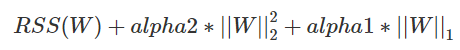

엘라스틱넷의 규제를 a * L1 + b * L2 라고하면 
- alpha : a+b
- l1_raito : a/(a+b), 따라서 l1_ratio가 0이면 L2규제, 1이면 L1규제

In [ ]:
elastic_alphas = [0.07,0.1, 0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data = X_data, y_target = y_target)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068


In [ ]:
sort_column = 'alpha : '+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있음 

## 선형 회귀 모델을 위한 데이터 변환

선형 모델들의 특징
- 피처와 타겟값 간에 선형의 관계가 있다고 가정
- 피처값과 타겟값의 분포가 정규분포(평균을 중심으로 종모양으로 데이터가 분포되어 있는 형태) 형태를 띠는 것을 선호

데이터에 대한 스케일링/정규화 방법
- **StandardScaler** 스케일링을 사용하여 평균이 0, 분산이 1인 표준 정규 분포 만들기 or **MinMaxScaler** 스케일링을 사용하여 최솟값이 0, 최댓값이 1인 값으로 정규화
- **다항 특성 적용**하여 변환 : 피처 개수가 많을 경우 피처의 개수가 늘어나 시간이 오래 걸리고 과적합 
- **로그 변환** : log 함수 적용하면 정규 분포에 가까운 형태로 값이 분포 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data) # log1p를 사용하는 이유는 log는 언더플로우가 발생하기 때문에
  else:
    scaled_data = input_data
  
  if p_degree !=None:
    scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)

  return scaled_data

In [ ]:
alphas = [0.1, 1, 10, 100] # Ridge의 alpha 값을 다르게 적용하여 다양한 데이터 변환 방법에 따른 RMSE 추출

scale_methods = [(None, None), ('Standard',None),('Standard',2),('MinMax',None),
                 ('MinMax',2),('Log',None)]
for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],
                                  input_data = X_data)
  print(X_data_scaled.shape, X_data.shape)
  print("\n## 변환 유형 : {0}, Polynomial Degree : {1}".format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data = X_data_scaled, y_target = y_target, verbose = False, return_coeff = False)

(506, 13) (506, 13)

## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.330
(506, 13) (506, 13)

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.421
(506, 104) (506, 13)

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE : 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE : 4.634
(506, 13) (506, 13)

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE : 7.635
(506, 104) (506, 13)

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE : 4.323
alpha 1

- 표준 정규 분포와 최솟값/최댓값 정규화로는 성능 개선 안됨
- 표준 정규 분호와 최솟값/최댓값 정규화에 2차 다항식 변환을 했을 때 성능 개선 되었음, 하지만 다항식 변환은 피처의 개수가 많은 경우 적용하기 힘듦
- 로그 변환을 하였을 때 좋은 성능 향상이 있었음

선형 회귀를 적용하려는 데이터 세트에 데이터의 값의 분포가 심하게 왜곡되어 있을 경우에 로그 변환을 적용해보자!